In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set a random seed for consistent results
RANDOM_STATE = 42

print("=" * 50)
print("K-NN CLASSIFIER - SUPER SIMPLE FOR BEGINNERS")
print("=" * 50)

# Step 1: Load Data
# What: Load the Wine dataset
# Why: We need data to predict wine classes (0, 1, or 2)
# How: Use sklearn's load_wine dataset
print("\n1. LOADING DATA")
print("-" * 20)

wine_data = load_wine()
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target, name='Class')

print(f"Dataset has {X.shape[0]} wines and {X.shape[1]} features")
print(f"Classes: {wine_data.target_names}")
print(f"Features: {list(X.columns)}")

K-NN CLASSIFIER - SUPER SIMPLE FOR BEGINNERS

1. LOADING DATA
--------------------
Dataset has 178 wines and 13 features
Classes: ['class_0' 'class_1' 'class_2']
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Class, Length: 178, dtype: int32

In [5]:
y.value_counts()

Class
1    71
0    59
2    48
Name: count, dtype: int64

In [6]:
# Step 2: Preprocess Data
# What: Check the data for problems
# Why: Clean data makes better predictions
# How: Check for missing values and confirm numbers
print("\n2. PREPROCESSING DATA")
print("-" * 20)

print("Checking for missing values:")
print(X.isnull().sum().sum(), "missing values found")
print("All features are numbers - ready to go!")


2. PREPROCESSING DATA
--------------------
Checking for missing values:
0 missing values found
All features are numbers - ready to go!



3. EXPLORATORY DATA ANALYSIS
--------------------


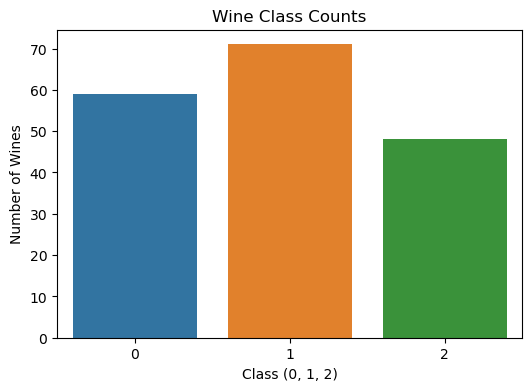

Saved class counts as 'class_distribution.png'


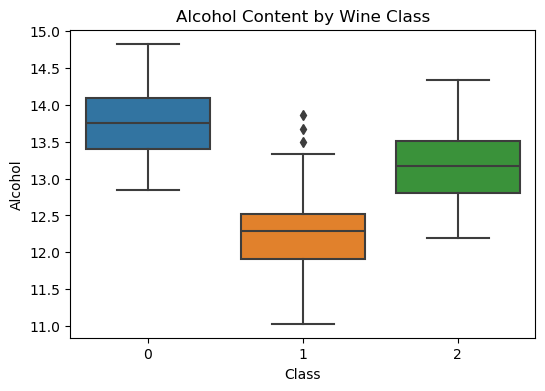

Saved alcohol plot as 'alcohol_by_class.png'


In [7]:
# Step 3: Exploratory Data Analysis (EDA)
# What: Look at the data with simple plots
# Why: See how features relate to wine classes
# How: Plot class counts and a key feature
print("\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 20)

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Wine Class Counts')
plt.xlabel('Class (0, 1, 2)')
plt.ylabel('Number of Wines')
plt.savefig('class_distribution.png')
plt.show()
print("Saved class counts as 'class_distribution.png'")

# Plot alcohol vs class
plt.figure(figsize=(6, 4))
sns.boxplot(x=y, y=X['alcohol'])
plt.title('Alcohol Content by Wine Class')
plt.xlabel('Class')
plt.ylabel('Alcohol')
plt.savefig('alcohol_by_class.png')
plt.show()
print("Saved alcohol plot as 'alcohol_by_class.png'")

In [8]:
# Step 4: Transform Data
# What: Scale features to same range
# Why: k-NN uses distances, so scales must match
# How: Use StandardScaler
print("\n4. DATA TRANSFORMATION")
print("-" * 20)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled all features")


4. DATA TRANSFORMATION
--------------------
Scaled all features


In [9]:
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
# Step 5: Split Data
# What: Divide data into training and testing
# Why: Train on some data, test on new data
# How: Use 80% for training, 20% for testing
print("\n5. SPLITTING DATA")
print("-" * 20)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"Training set: {X_train.shape[0]} wines")
print(f"Testing set: {X_test.shape[0]} wines")


5. SPLITTING DATA
--------------------
Training set: 142 wines
Testing set: 36 wines



6. CHOOSING BEST k
--------------------
Best k: 8


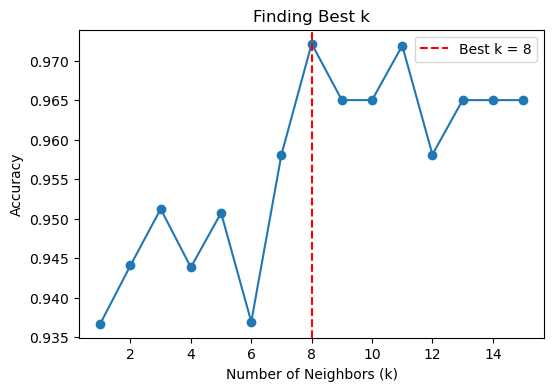

Saved k vs accuracy plot as 'k_vs_accuracy.png'


In [11]:
# Step 6: Choose k Value
# What: Find best number of neighbors
# Why: Right k gives better predictions
# How: Test k from 1 to 15
print("\n6. CHOOSING BEST k")
print("-" * 20)

k_range = range(1, 16)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = k_range[np.argmax(k_scores)]
print(f"Best k: {optimal_k}")

# Plot k vs accuracy
plt.figure(figsize=(6, 4))
plt.plot(k_range, k_scores, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Best k = {optimal_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Finding Best k')
plt.legend()
plt.savefig('k_vs_accuracy.png')
plt.show()
print("Saved k vs accuracy plot as 'k_vs_accuracy.png'")


In [12]:
# Step 7: Train k-NN Classifier
# What: Teach the model to predict classes
# Why: Model learns from training data
# How: Use KNeighborsClassifier with best k
print("\n7. TRAINING k-NN MODEL")
print("-" * 20)

knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)
print(f"Trained model with k={optimal_k}")


7. TRAINING k-NN MODEL
--------------------
Trained model with k=8


In [13]:
# Step 8: Evaluate Model
# What: Check how well the model predicts
# Why: Ensure it works on new data
# How: Calculate accuracy and show report
print("\n8. MODEL EVALUATION")
print("-" * 20)

y_test_pred = knn_model.predict(X_test)

def calculate_metrics(y_true, y_pred, name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.2f} ({accuracy*100:.1f}%)")
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=wine_data.target_names))
    return {'accuracy': accuracy}

test_metrics = calculate_metrics(y_test, y_test_pred, "Testing")



8. MODEL EVALUATION
--------------------

Testing Results:
Accuracy: 0.97 (97.2%)
Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [14]:
# Step 9: Hyperparameter Tuning
# What: Find better model settings
# Why: Improve prediction accuracy
# How: Test different k and weights
print("\n9. TUNING MODEL")
print("-" * 20)

param_grid = {
    'n_neighbors': [3, 5, 7, optimal_k],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print(f"Best settings: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_:.2f}")

best_knn = grid_search.best_estimator_
y_test_pred_tuned = best_knn.predict(X_test)
tuned_metrics = calculate_metrics(y_test, y_test_pred_tuned, "Tuned Model")


9. TUNING MODEL
--------------------
Best settings: {'n_neighbors': 8, 'weights': 'uniform'}
Best accuracy: 0.97

Tuned Model Results:
Accuracy: 0.97 (97.2%)
Classification Report:
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [15]:
# Step 10: Save Model
# What: Save the model for later
# Why: Use it without retraining
# How: Save with joblib
print("\n10. SAVING MODEL")
print("-" * 20)

joblib.dump(best_knn, 'knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')
print("Saved model, scaler, and feature names")


10. SAVING MODEL
--------------------
Saved model, scaler, and feature names


In [19]:
# Step 11: Test on New Data
# What: Predict class for a new wine
# Why: Check if model works on new data
# How: Use a sample wine and predict
print("\n11. TESTING ON NEW DATA")
print("-" * 20)

new_wine = X.iloc[30:31].copy()
new_scaled = scaler.transform(new_wine)
new_prediction = best_knn.predict(new_scaled)

print("Sample new wine:")
print(new_wine.iloc[0][['alcohol', 'flavanoids']].to_dict())
print(f"Predicted class: {wine_data.target_names[new_prediction[0]]}")


11. TESTING ON NEW DATA
--------------------
Sample new wine:
{'alcohol': 13.73, 'flavanoids': 3.25}
Predicted class: class_0
